In [1]:
%matplotlib widget
from main import *
import sympy as sp
import matplotlib.pyplot as plt
sp.init_printing()

In [2]:
Vin = sp.symbols('Vin')

In [3]:
stabilisator = Solver.Circuit("stabilisator")
stabilisator.element(
                    VoltageSource("Vg", {"V+" : "Vg", "V-" : Gnd}, V = Vin),
                    
                    Resistor("Rz", {"V1" : "Vg", "V2" : "Vz"}, R = 10e3),
                    Diode("Dz", {"Vp" : "Vz", "Vn" : Gnd}, Vd = 5.6),
                    
                    NPN("Q1", {"Vc" : "Vg", "Vb" : "Vz", "Ve" : "Vout"}),
                    
                    Resistor("Rl", {"V1" : "Vout", "V2" : Gnd}, R = 4.4e3),                    
)

{'Vg': {'name': 'Vg', 'type': 'VoltageSource', 'nodes': {'V+': 'Vg', 'V-': 0}, 'values': {'V': Vin}},
 'Rz': {'name': 'Rz', 'type': 'Resistor', 'nodes': {'V1': 'Vg', 'V2': 'Vz'}, 'values': {'R': 10000.0}},
 'Dz': {'name': 'Dz', 'type': 'Diode', 'nodes': {'Vp': 'Vz', 'Vn': 0}, 'values': {'Vd': 5.6}},
 'Q1': {'name': 'Q1', 'type': 'NPN', 'nodes': {'Vc': 'Vg', 'Vb': 'Vz', 'Ve': 'Vout'}, 'values': {'Vdf': 0.6, 'Vdr': 0.4, 'Bf': 100, 'Br': 0.1}},
 'Rl': {'name': 'Rl', 'type': 'Resistor', 'nodes': {'V1': 'Vout', 'V2': 0}, 'values': {'R': 4400.0}}}

In [4]:
Solver.setMain("stabilisator")
compiled = Solver.compile()

In [5]:
print(compiled["nodes"])

Iin = compiled["currents"]["Vg"]["V-"]
Vout = compiled["nodes"]["Vout"]
Iout = compiled["currents"]["Rl"]["V1"]
Vz = compiled["nodes"]["Vz"]
Iz = compiled["currents"]["Rz"]["V1"]

{'Vout': V0, 'Vg': V1, 'Vz': V2}


In [6]:
model = solveOP(compiled)

{I4_1, I2_1, I1_1, V1, I0_1, I2_0, I1_0, V2, I0_0, V0, I3_0, I3_1, I4_0, I3_2}
[Eq(I3_2 + I4_0, 0), Eq(I0_0 + I1_0 + I3_0, 0), Eq(I1_1 + I2_0 + I3_1, 0)]
{'Vg': {'name': 'Vg', 'type': 'VoltageSource', 'nodes': {'V+': 'Vg', 'V-': 0}, 'values': {'V': Vin}}, 'Rz': {'name': 'Rz', 'type': 'Resistor', 'nodes': {'V1': 'Vg', 'V2': 'Vz'}, 'values': {'R': 10000.0}}, 'Dz': {'name': 'Dz', 'type': 'Diode', 'nodes': {'Vp': 'Vz', 'Vn': 0}, 'values': {'Vd': 5.6}}, 'Q1': {'name': 'Q1', 'type': 'NPN', 'nodes': {'Vc': 'Vg', 'Vb': 'Vz', 'Ve': 'Vout'}, 'values': {'Vdf': 0.6, 'Vdr': 0.4, 'Bf': 100, 'Br': 0.1}}, 'Rl': {'name': 'Rl', 'type': 'Resistor', 'nodes': {'V1': 'Vout', 'V2': 0}, 'values': {'R': 4400.0}}}
{'Vg': {'V+': V1, 'V-': 0}, 'Rz': {'V1': V1, 'V2': V2}, 'Dz': {'Vp': V2, 'Vn': 0}, 'Q1': {'Vc': V1, 'Vb': V2, 'Ve': V0}, 'Rl': {'V1': V0, 'V2': 0}}
{'Vg': {'V+': I0_0, 'V-': I0_1}, 'Rz': {'V1': I1_0, 'V2': I1_1}, 'Dz': {'Vp': I2_0, 'Vn': I2_1}, 'Q1': {'Vc': I3_0, 'Vb': I3_1, 'Ve': I3_2}, 'Rl': {'V1': 

In [7]:
printModel(model, var=Vin, measurments=[Vout])

{('Q1', 'Cut'), ('Dz', 'Cut')}
Vin ∈ Interval(-oo, 0.600000000000000)
V0  : 
0.0
-------------------------------------
{('Q1', 'Fwd'), ('Dz', 'Cut')}
Vin ∈ Interval.open(0.600000000000000, 5.71251125112511)
V0  : 
0.977992957746479⋅Vin - 0.586795774647887
-------------------------------------
{('Q1', 'Fwd'), ('Dz', 'Fwd')}
Vin ∈ Interval(5.71251125112511, oo)
V0  : 
5.00000000000000
-------------------------------------


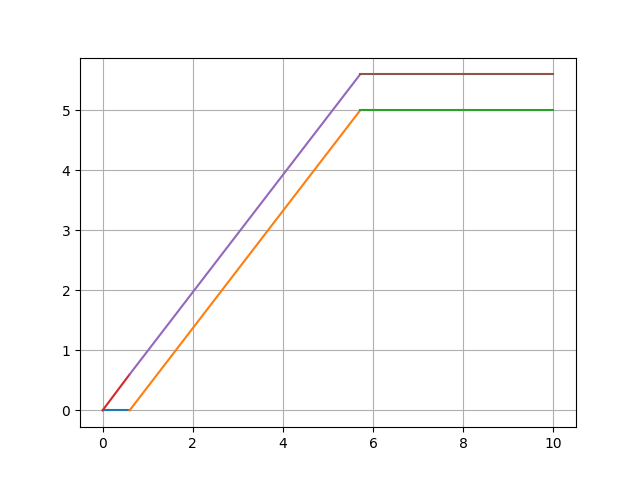

In [9]:
measurments =   [   
                    (Vin, Vout, "Vout(Vin)"),
                    #(Vin, Iin, "Iin(Vin)"),
                    (Vin, Vz, "Vz(Vin)"),
                    #(Vin, Iz, "Iz(Vin)"),
                    #(Vin, Iout, "Iout(Vin)"),                    
                ]

plotMeasurments(model, Vin, 0, 10, 0.1, measurments)